In [1]:
import csv
import pandas as pd
import os
import numpy as np
import pyodbc
import sqlalchemy as db
import urllib

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv("Date_curatate_Calin.csv")
df

,Unnamed: 0,Cod unic candidat,Sex,Specializare,Profil,Fileira,Forma de învățământ,Mediu candidat,Unitate (SIIIR),STATUS,...,locality,runningWater,canalization,gas,electricity,heating,salubrity,centralHeating,amplasare_toaleta_0ext_1int_0nan,stare_toaleta_1coresp_0necoresp_1reabil_0nan
0,0,10005,M,TEHNICIAN_IN_AUTOMATIZARI,TEHNIC,TEHNOLOGICA,ZI,URBAN,3261101959,NEPROMOVAT,...,SIBIU,1,1,1,1,1,1,1,1,1
1,1,12037,M,STIINTE_SOCIALE,UMAN,TEORETICA,FRECVENTA_REDUSA,URBAN,3661100016,PROMOVAT,...,TULCEA,0,0,0,0,0,0,0,0,0
2,2,12284,M,TEHNICIAN_IN_TURISM,SERVICII,TEHNOLOGICA,ZI,URBAN,1161104376,PROMOVAT,...,BAILE_HERCULANE,0,0,0,0,0,0,0,0,0
3,3,12865,F,FILOLOGIE,UMAN,TEORETICA,ZI,URBAN,961100082,NEPROMOVAT,...,FAUREI,1,1,1,1,0,1,1,1,1
4,4,12923,F,ORGANIZATOR_BANQUETING,SERVICII,TEHNOLOGICA,ZI,RURAL,2461103282,PROMOVAT,...,SIGHETU_MARMATIEI,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131253,131253,1428699,F,MUZICA,ARTISTIC,VOCATIONALA,ZI,URBAN,3661100554,PROMOVAT,...,TULCEA,0,0,0,0,0,0,0,0,0
131254,131254,1428838,F,TEHNICIAN_IN_ACTIVITATI_DE_COMERT,SERVICII,TEHNOLOGICA,ZI,RURAL,1761101468,NEPROMOVAT,...,CUDALBI,0,0,0,1,0,0,0,0,1
131255,131255,1428841,M,TEHNICIAN_IN_ACTIVITATI_DE_COMERT,SERVICII,TEHNOLOGICA,ZI,RURAL,1761101468,PROMOVAT,...,CUDALBI,0,0,0,1,0,0,0,0,1
131256,131256,1428971,M,LICEU_CU_PROGRAM_SPORTIV,EDUCATIE_FIZICA_SI_SPORT,VOCATIONALA,ZI,URBAN,1761101206,NEPROMOVAT,...,GALATI,1,1,1,1,0,1,1,1,1


In [127]:
df.describe()

,Unnamed: 0,Cod unic candidat,Unitate (SIIIR),Medie,runningWater,canalization,gas,electricity,heating,salubrity,centralHeating,amplasare_toaleta_0ext_1int_0nan,stare_toaleta_1coresp_0necoresp_1reabil_0nan
count,131258.000000,1.312580e+05,1.312580e+05,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000,131258.000000
mean,65628.500000,1.328542e+06,2.335972e+09,6.070560,0.736549,0.714486,0.462425,0.758308,0.393599,0.728024,0.518071,0.705153,0.764906
std,37891.065154,1.679732e+05,1.297523e+09,3.413018,0.440506,0.451661,0.498588,0.428110,0.488550,0.444979,0.499675,0.455976,0.424059
min,0.000000,1.000500e+04,1.611000e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32814.250000,1.328924e+06,1.261103e+09,5.660000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,65628.500000,1.362250e+06,2.261107e+09,7.330000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,98442.750000,1.395587e+06,3.461101e+09,8.580000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,131257.000000,1.429010e+06,5.261102e+09,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131258 entries, 0 to 131257
Data columns (total 27 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Unnamed: 0                                    131258 non-null  int64  
 1   Cod unic candidat                             131258 non-null  int64  
 2   Sex                                           131258 non-null  object 
 3   Specializare                                  131258 non-null  object 
 4   Profil                                        131258 non-null  object 
 5   Fileira                                       131258 non-null  object 
 6   Forma de învățământ                           131258 non-null  object 
 7   Mediu candidat                                131258 non-null  object 
 8   Unitate (SIIIR)                               131258 non-null  int64  
 9   STATUS                                        13

In [150]:
df.value_counts('schoolType')

schoolType
UNITATE_DE_INVATAMANT    129996
NAN                        1006
CLUB_SPORTIV_SCOLAR         256
Name: count, dtype: int64

## Agregate dataframe

In [33]:
## Created x variable for displaying the 

x = df.groupby('county')[['runningWater', 'canalization',
       'gas', 'electricity', 'heating', 'salubrity', 'centralHeating',
       'amplasare_toaleta_0ext_1int_0nan',
       'stare_toaleta_1coresp_0necoresp_1reabil_0nan']]

x.first()

,runningWater,canalization,gas,electricity,heating,salubrity,centralHeating,amplasare_toaleta_0ext_1int_0nan,stare_toaleta_1coresp_0necoresp_1reabil_0nan
county,,,,,,,,,
ALBA,1,1,1,1,1,1,1,1,1
ARAD,1,1,0,1,1,1,0,1,1
ARGES,0,0,0,0,0,0,0,0,0
BACAU,1,1,0,1,1,1,0,1,1
BIHOR,1,1,0,1,1,1,1,1,1
BISTRITA_NASAUD,0,0,0,1,0,1,0,0,1
BOTOSANI,1,1,0,1,0,1,1,0,1
BRAILA,1,1,1,1,0,1,1,1,1
BRASOV,1,1,0,1,1,1,0,1,1


## % of utilities in School Units by county

In [48]:
percentage_of_utilities = (100. * x.sum()/x.count()).round(1).astype(str) + '%'
percentage_of_utilities

,runningWater,canalization,gas,electricity,heating,salubrity,centralHeating,amplasare_toaleta_0ext_1int_0nan,stare_toaleta_1coresp_0necoresp_1reabil_0nan
county,,,,,,,,,
ALBA,94.9%,88.5%,79.5%,94.9%,48.2%,92.4%,91.5%,92.7%,94.9%
ARAD,71.6%,69.5%,33.2%,71.6%,55.5%,68.0%,38.3%,70.3%,71.6%
ARGES,75.8%,73.9%,61.3%,80.8%,27.1%,78.7%,66.2%,73.2%,80.8%
BACAU,71.0%,70.9%,46.0%,71.0%,30.6%,64.2%,52.4%,69.9%,71.0%
BIHOR,56.5%,53.5%,13.1%,56.5%,30.9%,56.5%,39.7%,53.5%,56.5%
BISTRITA_NASAUD,47.5%,46.4%,45.6%,50.5%,22.8%,60.9%,53.3%,55.9%,60.9%
BOTOSANI,85.0%,84.4%,60.8%,87.8%,50.8%,87.2%,60.4%,84.3%,87.8%
BRAILA,67.4%,67.4%,60.1%,73.7%,9.1%,73.7%,67.5%,62.5%,73.7%
BRASOV,84.5%,82.8%,68.5%,87.0%,28.7%,83.2%,70.5%,87.0%,87.0%


## Mean and median of BAC grades by County

In [79]:
bac_grades = df.groupby('county')['Medie'].agg(['mean', 'median']).reset_index()
bac_grades = bac_grades.rename(columns={'mean': 'Average', 'median': 'Median'})
bac_grades

,county,Average,Median
0,ALBA,6.638225,7.780
1,ARAD,5.548065,6.780
2,ARGES,6.395860,7.530
3,BACAU,6.805519,7.660
4,BIHOR,6.192108,7.410
5,BISTRITA_NASAUD,6.363506,7.360
6,BOTOSANI,5.900740,7.200
7,BRAILA,6.886719,7.730
8,BRASOV,6.643249,7.610
9,BUZAU,6.317511,7.510


In [103]:
utility_variables = ['runningWater', 'canalization', 'gas', 'electricity', 'heating', 'salubrity', 'centralHeating']

# Calculate descriptive statistics
descriptive_stats = df.groupby('county')[utility_variables].describe()

# Display the descriptive statistics
descriptive_stats


runningWater                                          \
                            count      mean       std  min  25%  50%  75%   
county                                                                      
ALBA                       2231.0  0.948902  0.220247  0.0  1.0  1.0  1.0   
ARAD                       2770.0  0.715884  0.451074  0.0  0.0  1.0  1.0   
ARGES                      4399.0  0.757672  0.428540  0.0  1.0  1.0  1.0   
BACAU                      3709.0  0.709625  0.453997  0.0  0.0  1.0  1.0   
BIHOR                      3530.0  0.565156  0.495807  0.0  0.0  1.0  1.0   
BISTRITA_NASAUD            1857.0  0.474960  0.499507  0.0  0.0  0.0  1.0   
BOTOSANI                   2785.0  0.849910  0.357224  0.0  1.0  1.0  1.0   
BRAILA                     1649.0  0.674348  0.468760  0.0  0.0  1.0  1.0   
BRASOV                     3207.0  0.845338  0.361638  0.0  1.0  1.0  1.0   
BUZAU                      2997.0  0.733734  0.442079  0.0  0.0  1.0  1.0   
CALARASI                   1382.0  0.872648  0.333487  0.0  1.0  1.0  1.0   
CARAS_SEVERIN              1692.0  0.634752  0.481642  0.0  0.0  1.0  1.0   
CLUJ                       4175.0  0.832335  0.373613  0.0  1.0  1.0  1.0   
CONSTANTA                  4790.0  0.853653  0.353490  0.0  1.0  1.0  1.0   
COVASNA                    1198.0  0.690317  0.462556  0.0  0.0  1.0  1.0   
DAMBOVITA                  3004.0  0.913116  0.281712  0.0  1.0  1.0  1.0   
DOLJ                       3865.0  0.666494  0.471526  0.0  0.0  1.0  1.0   
GALATI                     3237.0  0.720111  0.449014  0.0  0.0  1.0  1.0   
GIURGIU                    1158.0  0.785838  0.410417  0.0  1.0  1.0  1.0   
GORJ                       2910.0  0.600000  0.489982  0.0  0.0  1.0  1.0   
HARGHITA                   2119.0  0.697971  0.459246  0.0  0.0  1.0  1.0   
HUNEDOARA                  2361.0  0.932232  0.251400  0.0  1.0  1.0  1.0   
IALOMITA                   1592.0  0.726131  0.446083  0.0  0.0  1.0  1.0   
IASI                       5305.0  0.756268  0.429374  0.0  1.0  1.0  1.0   
ILFOV                       786.0  0.854962  0.352364  0.0  1.0  1.0  1.0   
MARAMURES                  3384.0  0.767730  0.422342  0.0  1.0  1.0  1.0   
MEHEDINTI                  1757.0  0.748435  0.434036  0.0  0.0  1.0  1.0   
MUNICIPIUL_BUCURESTI      16621.0  0.614163  0.486807  0.0  0.0  1.0  1.0   
MURES                      3379.0  0.549275  0.497640  0.0  0.0  1.0  1.0   
NAN                        1006.0  0.000000  0.000000  0.0  0.0  0.0  0.0   
NEAMT                      3177.0  0.852691  0.354469  0.0  1.0  1.0  1.0   
OLT                        2425.0  0.821856  0.382713  0.0  1.0  1.0  1.0   
PRAHOVA                    5319.0  0.823839  0.380993  0.0  1.0  1.0  1.0   
SALAJ                      1533.0  0.769080  0.421559  0.0  1.0  1.0  1.0   
SATU_MARE                  1876.0  0.755330  0.430006  0.0  1.0  1.0  1.0   
SIBIU                      2487.0  0.733816  0.442051  0.0  0.0  1.0  1.0   
SUCEAVA                    5170.0  0.785880  0.410250  0.0  1.0  1.0  1.0   
TELEORMAN                  1943.0  0.946475  0.225137  0.0  1.0  1.0  1.0   
TIMIS                      4266.0  0.766995  0.422795  0.0  1.0  1.0  1.0   
TULCEA                     1144.0  0.729895  0.444208  0.0  0.0  1.0  1.0   
VALCEA                     2385.0  0.837736  0.368770  0.0  1.0  1.0  1.0   
VASLUI                     2496.0  0.555689  0.496989  0.0  0.0  1.0  1.0   
VRANCEA                    2182.0  0.904675  0.293731  0.0  1.0  1.0  1.0   

                          canalization            ... salubrity       \
                      max        count      mean  ...       75%  max   
county                                            ...                  
ALBA                  1.0       2231.0  0.885253  ...       1.0  1.0   
ARAD                  1.0       2770.0  0.694585  ...       1.0  1.0   
ARGES                 1.0       4399.0  0.738804  ...       1.0  1.0   
BACAU                 1.0       3709.0  0.7088

In [126]:
# Summary
heating_stats = df.groupby('heating')['Medie'].agg(['mean', 'median', 'std', 'count']).reset_index()
print(heating_stats)

   heating      mean  median       std  count
0        0  5.972076    7.23  3.449755  79595
1        1  6.222289    7.46  3.350004  51663


## Visualizations

### % of scholar units with electric heat by county

Text(0, 0.5, 'County')

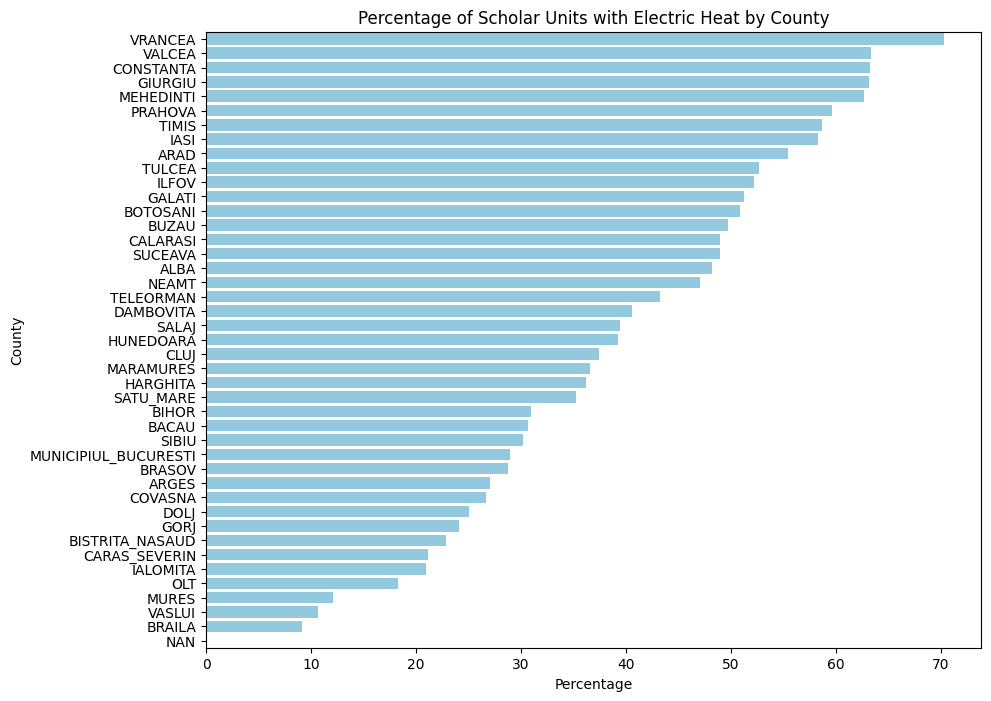

In [78]:
# Calculate the percentage of scholar units with electric heat by county

percentage_heating_by_county = (
    df.groupby('county')['heating'].mean() * 100
).reset_index()

# Sort the DataFrame by percentage

percentage_heating_by_county = percentage_heating_by_county.sort_values(by='heating', ascending=False)


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='heating', y='county', data=percentage_heating_by_county, color='skyblue')

plt.title('Percentage of Scholar Units with Electric Heat by County')
plt.xlabel('Percentage')
plt.ylabel('County')

### % of scholar units with electricity by county

Text(0, 0.5, 'County')

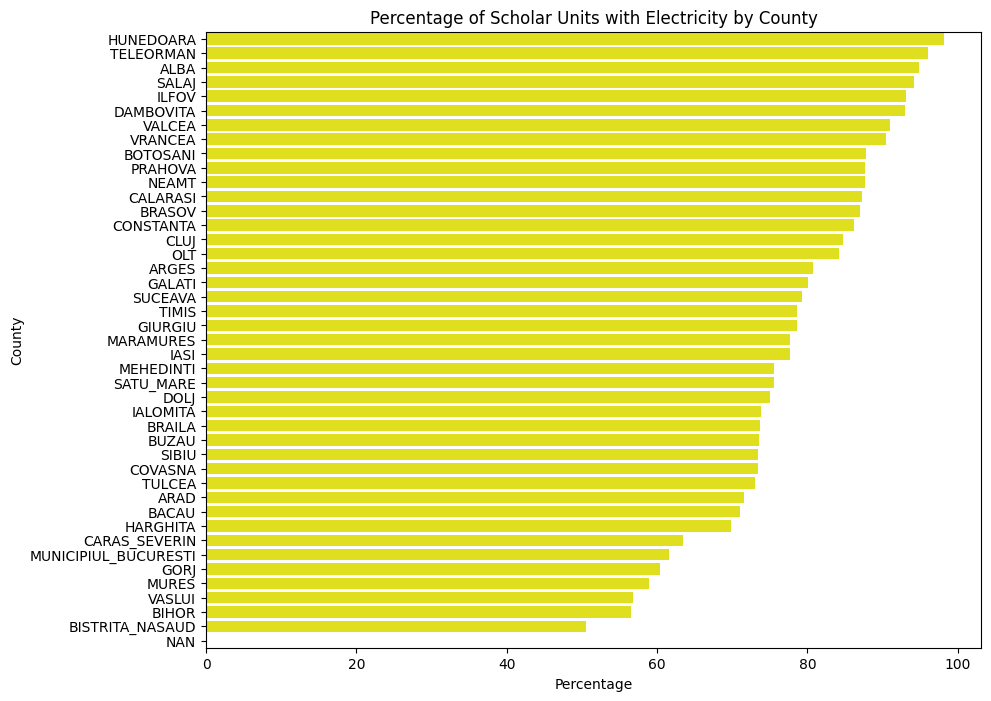

In [92]:
percentage_electricity_by_county = (
    df.groupby('county')['electricity'].mean() * 100
).reset_index()

# Sort the DataFrame by percentage

percentage_electricity_by_county = percentage_electricity_by_county.sort_values(by='electricity', ascending=False)


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='electricity', y='county', data=percentage_electricity_by_county, color='yellow')

plt.title('Percentage of Scholar Units with Electricity by County')
plt.xlabel('Percentage')
plt.ylabel('County')

### Average grades by county

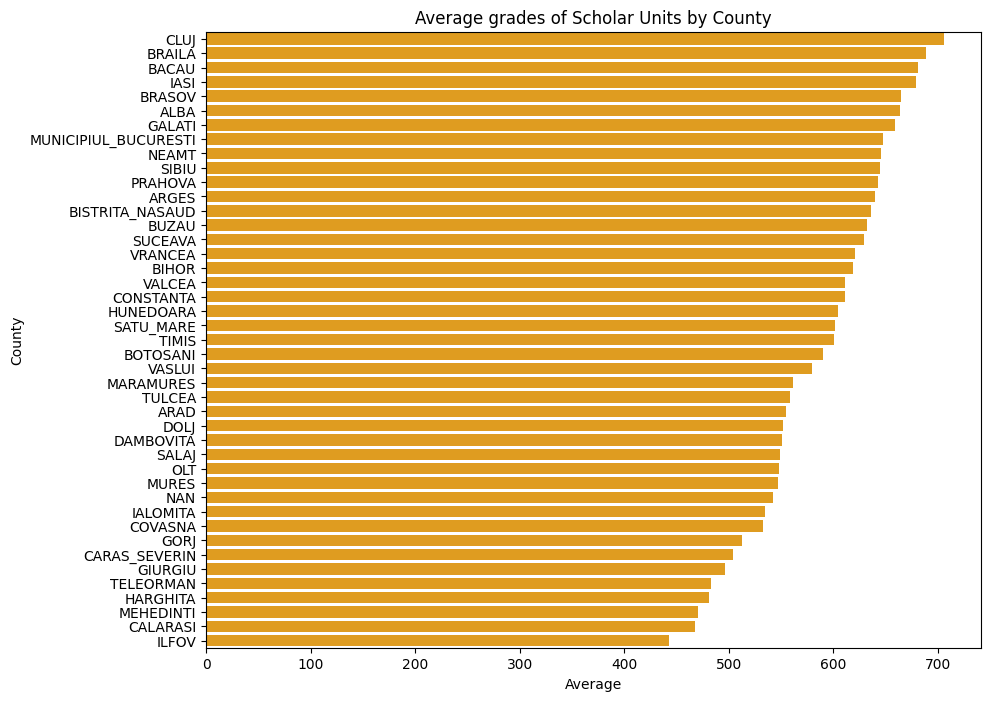

In [85]:
percentage_grades_by_county = (
    df.groupby('county')['Medie'].mean() * 100
).reset_index()

# Sort the DataFrame by percentage
percentage_grades_by_county = percentage_grades_by_county.sort_values(by='Medie', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Medie', y='county', data=percentage_grades_by_county, color='orange')

plt.title('Average grades of Scholar Units by County')
plt.xlabel('Average')
plt.ylabel('County')

plt.show()

### % of canalization by County

Text(0, 0.5, 'County')

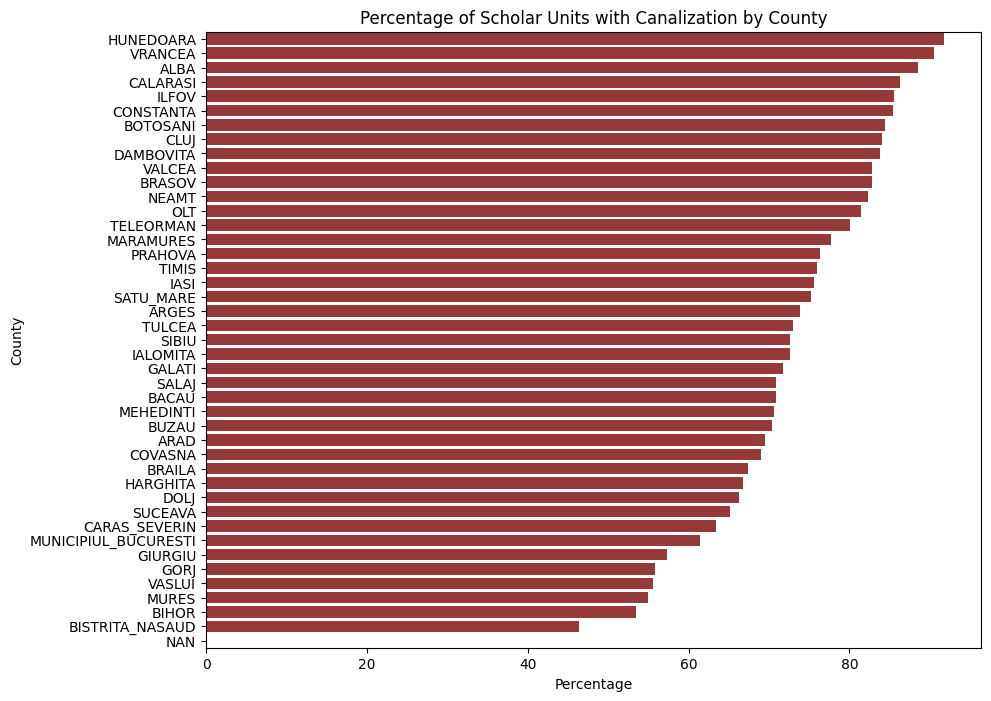

In [96]:
percentage_canalization_by_county = (
    df.groupby('county')['canalization'].mean() * 100
).reset_index()

# Sort the DataFrame by percentage

percentage_canalization_by_county = percentage_canalization_by_county.sort_values(by='canalization', ascending=False)


# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='canalization', y='county', data=percentage_canalization_by_county, color='brown')

plt.title('Percentage of Scholar Units with Canalization by County')
plt.xlabel('Percentage')
plt.ylabel('County')